**This is a Simple Data Analysis work.We use #Iris Dataset. Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("../input/iris-data-set-for-beginners/iris.csv", index_col=0)

In [3]:
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
dataset.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

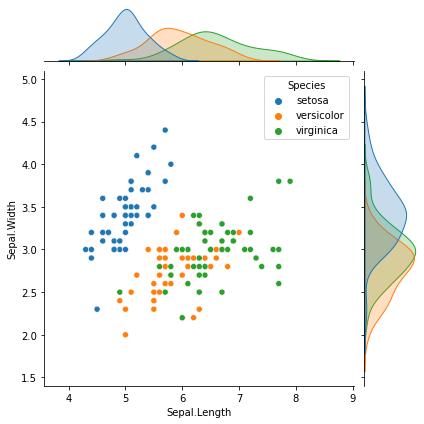

In [6]:
sns.jointplot(data = dataset, x='Sepal.Length', y='Sepal.Width',kind='scatter', hue = 'Species')

Visualizing three catogories of flowers,that is  using one of the features petal length

<AxesSubplot:xlabel='Species', ylabel='Petal.Length'>

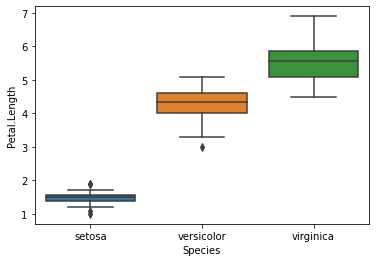

In [7]:
sns.boxplot(x="Species",y="Petal.Length",data = dataset)

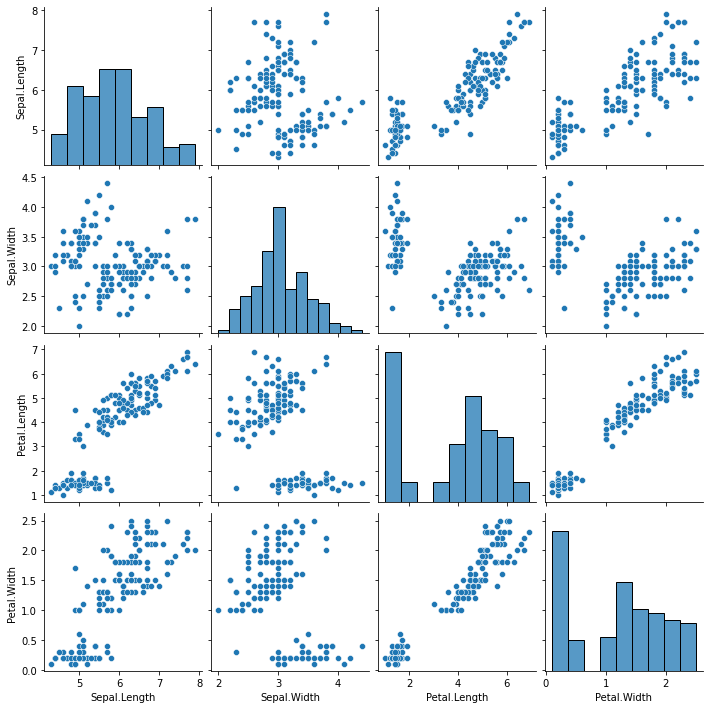

In [8]:
sns.pairplot(dataset)

In [9]:
x = dataset.drop('Species', axis=1)
y1=dataset['Species']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y1)
y = le.transform(y1)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [13]:
pred = knn.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
#Choosing the better k value using elbow method:
error_rate=[]
for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    k_pred = knn.predict(x_test)
    error_rate.append(np.mean(k_pred!=y_test))

Text(0, 0.5, 'Error rate')

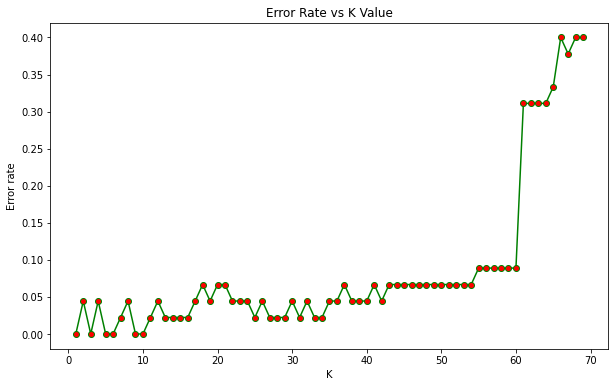

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,marker='o',markerfacecolor='red',linestyle='-',color='green' )
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

##### We can observe that k value is good around 1 hence we got better results above also kvalue around 1,3,5,6,9,10 almost gives best results

### SVC

In [17]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
s_pred = svc_model.predict(x_test)

In [18]:
print(confusion_matrix(y_test,s_pred))
print("\n")
print(classification_report(y_test, s_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



##### choosing better c and gamma (hyperparameters) values using gridsearch

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001]}
gs = GridSearchCV(SVC(),params,verbose=2)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [20]:
gs.best_estimator_

SVC(C=1, gamma=0.1)

In [21]:
gs.best_params_

{'C': 1, 'gamma': 0.1}

In [22]:
gs_pred = gs.predict(x_test)
print(confusion_matrix(y_test,gs_pred))
print("\n")
print(classification_report(y_test,gs_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
print(confusion_matrix(y_test,dt_pred))
print("\n")
print(classification_report(y_test,dt_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,lr_pred))
print("\n")
print(classification_report(y_test,lr_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
